# Przygotowanie modelu

Import packages for analyzing and visualising data

In [77]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Paths for data source

In [78]:
finance_path = './finance_employees.csv'
users_path = './active_users.csv'

importing finance and employees data

In [79]:
# Read the finance data
finance_data = pd.read_csv(finance_path, delimiter=',', header=0)

# Display the dataframe
print(finance_data)

    Year  Income  Profit  Employees
0   2007     153    -138        450
1   2008     272     -56        850
2   2009     777     229       1218
3   2010    1974     606       2127
4   2011    3711    1000       3200
5   2012    5089      53       4619
6   2013    7872    1500       6337
7   2014   12466    2940       9199
8   2015   17928    3688      12691
9   2016   27638   10217      17048
10  2017   40653   15934      25105


User data import

In [80]:
users_data = pd.read_csv(users_path, delimiter=',', header=0)

# Display the dataframe
print(users_data)

    Year  Quarter  Users
0   2008        3    100
1   2009        1    197
2   2009        2    242
3   2009        3    305
4   2009        4    360
5   2010        1    431
6   2010        2    482
7   2010        3    550
8   2010        4    608
9   2011        1    680
10  2011        2    739
11  2011        3    800
12  2011        4    845
13  2012        1    901
14  2012        2    955
15  2012        3   1007
16  2012        4   1056
17  2013        1   1110
18  2013        2   1155
19  2013        3   1189
20  2013        4   1228
21  2014        1   1276
22  2014        2   1317
23  2014        3   1350
24  2014        4   1393
25  2015        1   1441
26  2015        2   1490
27  2015        3   1545
28  2015        4   1591
29  2016        1   1654
30  2016        2   1712
31  2016        3   1788
32  2016        4   1860
33  2017        1   1936
34  2017        2   2006
35  2017        3   2072
36  2017        4   2129


Visualisation of imported data

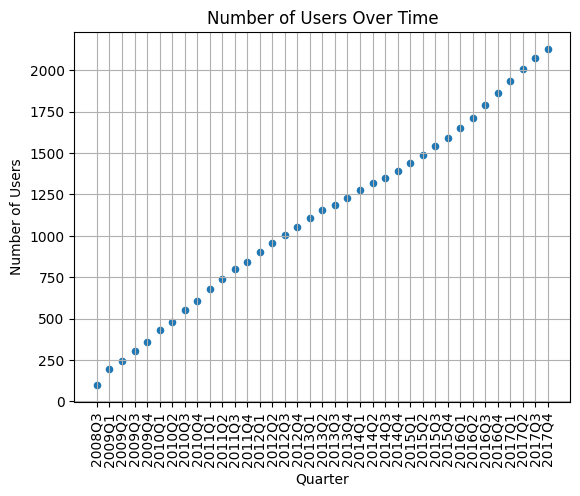

In [81]:
users_data['Year_Quarter'] = users_data['Year'].astype(str) + 'Q' + users_data['Quarter'].astype(str)

users_data.plot(x='Year_Quarter', y='Users', kind='scatter', marker='o', title='Number of Users Over Time')
plt.xlabel('Quarter')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

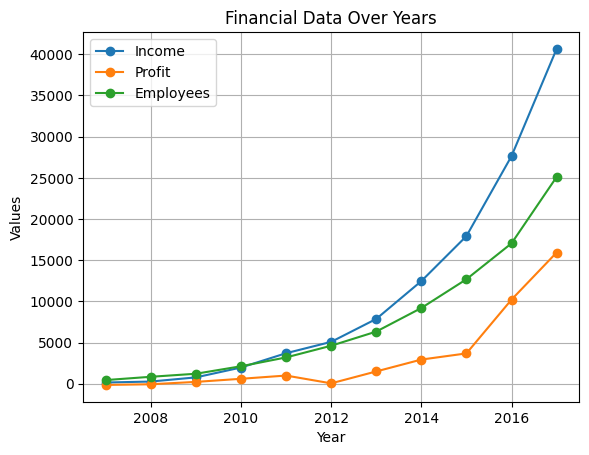

In [82]:
finance_data.plot(x='Year', y=['Income', 'Profit', 'Employees'], kind='line', marker='o', title='Financial Data Over Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.legend(['Income', 'Profit', 'Employees'])
plt.show()

# Liczba użytkowników

### Dodanie modelu regresji liniowej do wykresu liczby użytkowników w czasie

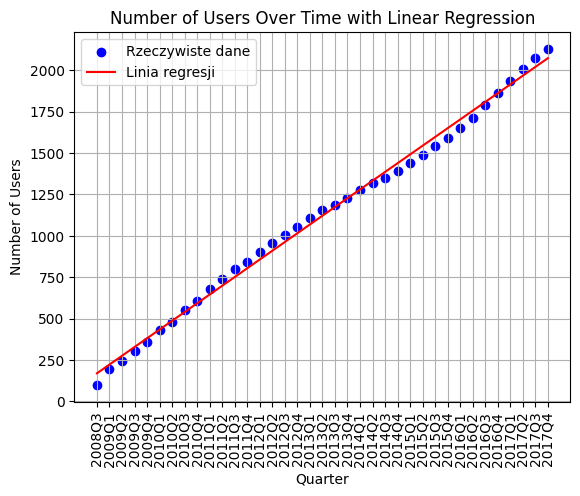

In [83]:
from sklearn.linear_model import LinearRegression

# Przygotowanie danych do modelu regresji
X = users_data.index.values.reshape(-1, 1)  # Używamy indeksu jako zmiennej niezależnej
y = users_data['Users'].values  # Zmienna zależna

# Tworzenie i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Przewidywanie wartości
y_pred = model.predict(X)

# Rysowanie wykresu z linią regresji
plt.scatter(users_data['Year_Quarter'], users_data['Users'], color='blue', label='Rzeczywiste dane')
plt.plot(users_data['Year_Quarter'], y_pred, color='red', label='Linia regresji')
plt.xlabel('Quarter')
plt.ylabel('Number of Users')
plt.title('Number of Users Over Time with Linear Regression')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

### Wyświetlanie parametrów regresji liniowej

In [84]:
import statsmodels.api as sm

# Konwersja kolumny Year_Quarter na wartości numeryczne
users_data['Year_Quarter_Num'] = pd.factorize(users_data['Year_Quarter'])[0]

# Przygotowanie danych do modelu regresji
X = sm.add_constant(users_data['Year_Quarter_Num'])  # Dodanie stałej do modelu
y = users_data['Users']

# Tworzenie i trenowanie modelu regresji liniowej
model_users = sm.OLS(y, X).fit()

# Wyświetlanie wyników modelu
print(model_users.summary())

# Wyciąganie parametrów strukturalnych
params = model_users.params
print("Parametry strukturalne:", params)

# Wyciąganie odchyleń standardowych
std_err = model_users.bse
print("Odchylenia standardowe:", std_err)

# Wyciąganie miar dopasowania
r_squared = model_users.rsquared
print("R-kwadrat:", r_squared)

# Testowanie hipotez
hypothesis_test = model_users.t_test([1, 0])
print("Test hipotezy dla wyrazu wolnego:", hypothesis_test)

                            OLS Regression Results                            
Dep. Variable:                  Users   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7729.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.18e-42
Time:                        17:24:21   Log-Likelihood:                -187.07
No. Observations:                  37   AIC:                             378.1
Df Residuals:                      35   BIC:                             381.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              170.1906     12.583  

### Predykcja danych

#### 2018-2020

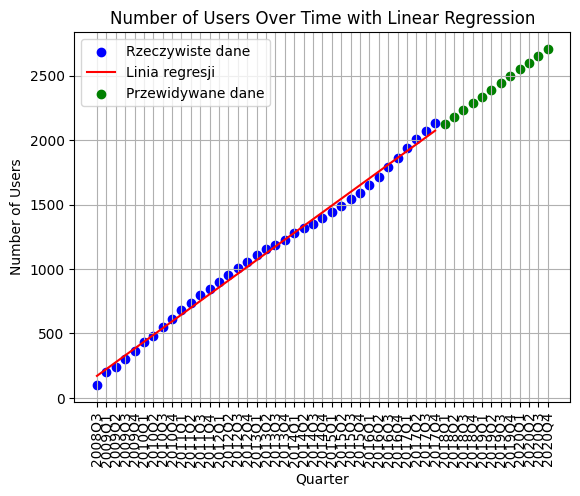

   Year_Quarter        Users
0        2018Q1  2125.909910
1        2018Q2  2178.767188
2        2018Q3  2231.624467
3        2018Q4  2284.481745
4        2019Q1  2337.339023
5        2019Q2  2390.196302
6        2019Q3  2443.053580
7        2019Q4  2495.910858
8        2020Q1  2548.768137
9        2020Q2  2601.625415
10       2020Q3  2654.482693
11       2020Q4  2707.339972


In [85]:
# Przygotowanie danych do predykcji
future_indices = np.array([[37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48]])  # Indeksy dla przyszłych kwartałów

# Przewidywanie wartości
future_users_pred = model.predict(future_indices)

# Dodanie przewidywanych wartości do istniejących danych
future_years_quarters = ['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4']
future_data = pd.DataFrame({'Year_Quarter': future_years_quarters, 'Users': future_users_pred})

# Wyświetlanie przewidywanych wartości
# print(future_data)

# rysowanie wykresu z przewidywanymi wartościami
plt.scatter(users_data['Year_Quarter'], users_data['Users'], color='blue', label='Rzeczywiste dane')
plt.plot(users_data['Year_Quarter'], y_pred, color='red', label='Linia regresji')
plt.scatter(future_data['Year_Quarter'], future_data['Users'], color='green', label='Przewidywane dane')
plt.xlabel('Quarter')
plt.ylabel('Number of Users')
plt.title('Number of Users Over Time with Linear Regression')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

print(future_data)


#### Dane rzeczywiste

In [86]:
'''
2018	2.196; 2.234; 2.271; 2.320
2019	2.375; 2.414; 2.449; 2.498
2020	2.603; 2.701; 2.740; 2.797
'''
future_real_data = pd.DataFrame({'Year_Quarter': future_years_quarters, 'Users': [2196, 2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797]})
print(future_real_data)

   Year_Quarter  Users
0        2018Q1   2196
1        2018Q2   2234
2        2018Q3   2271
3        2018Q4   2320
4        2019Q1   2375
5        2019Q2   2414
6        2019Q3   2449
7        2019Q4   2498
8        2020Q1   2603
9        2020Q2   2701
10       2020Q3   2740
11       2020Q4   2797


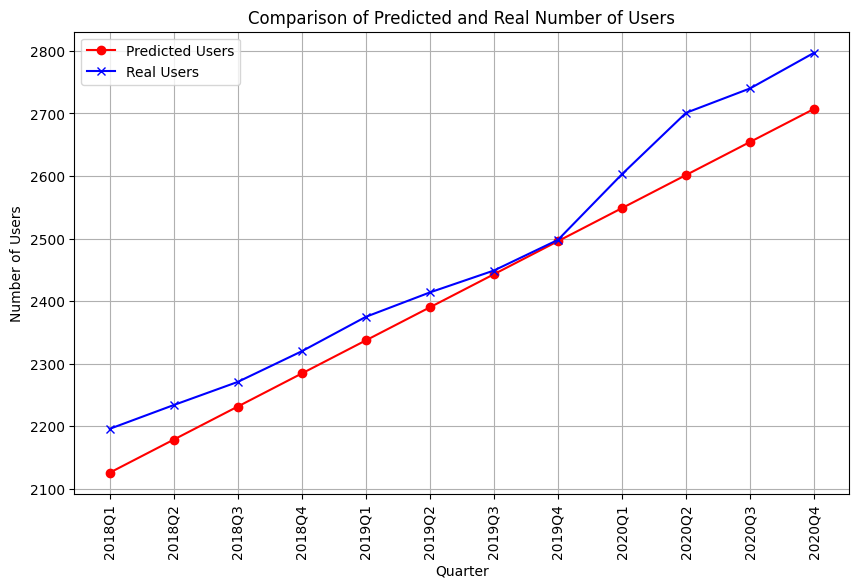

In [87]:
# Plotting the predicted and real data for comparison
plt.figure(figsize=(10, 6))

# Plot predicted data
plt.plot(future_data['Year_Quarter'], future_data['Users'], color='red', marker='o', label='Predicted Users')

# Plot real data
plt.plot(future_real_data['Year_Quarter'], future_real_data['Users'], color='blue', marker='x', label='Real Users')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Number of Users')
plt.title('Comparison of Predicted and Real Number of Users')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Show plot
plt.show()



##### Pomiar dokładność predykcji

Aby ocenić dokładność predykcji modelu regresji liniowej, możemy skorzystać z różnych miar, takich jak:

- **Mean Absolute Error (MAE)**: Średnia wartość bezwzględnych różnic między rzeczywistymi a przewidywanymi wartościami.
- **Mean Squared Error (MSE)**: Średnia wartość kwadratów różnic między rzeczywistymi a przewidywanymi wartościami.
- **Root Mean Squared Error (RMSE)**: Pierwiastek kwadratowy z MSE, który jest w tej samej skali co dane.
- **R-squared (R²)**: Miara dopasowania modelu, która wskazuje, jaka część zmienności danych jest wyjaśniana przez model.

W kolejnych komórkach obliczymy te miary dla naszych modeli predykcji liczby użytkowników oraz dochodów finansowych.
```

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(future_real_data['Users'], future_data['Users'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(future_real_data['Users'], future_data['Users'])
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 49.87505926979615
Mean Squared Error (MSE): 3414.0405496834796
Root Mean Squared Error (RMSE): 58.42979162793138


#### Ocena wartości miar dokładności predykcji

##### Mean Absolute Error (MAE)
- **MAE**: 49.88
    - Średnia wartość bezwzględnych różnic między rzeczywistymi a przewidywanymi wartościami wynosi 49.88. Oznacza to, że przeciętna różnica między przewidywaną a rzeczywistą liczbą użytkowników wynosi około 50 użytkowników.

##### Root Mean Squared Error (RMSE)
- **RMSE**: 58.43
    - RMSE jest bardziej intuicyjną miarą, ponieważ jest wyrażona w tych samych jednostkach co dane. Wskazuje, że przeciętna różnica między przewidywaną a rzeczywistą liczbą użytkowników wynosi około 58 użytkowników.

##### R-squared (R²)
- **R²**: 0.80
    - Miara dopasowania modelu wynosi 0.80, co oznacza, że model wyjaśnia 80% zmienności danych. Jest to stosunkowo wysoka wartość, co sugeruje, że model dobrze dopasowuje się do danych.

##### Podsumowanie
- Model regresji liniowej dla liczby użytkowników wykazuje stosunkowo dobrą dokładność predykcji, o czym świadczą wartości MAE, MSE, RMSE oraz R².
- Warto jednak pamiętać, że zawsze istnieje pewien margines błędu, a rzeczywiste wartości mogą się różnić od przewidywanych.

#### 2021-2023

In [ ]:
'''
In millions
2018	2196; 2234; 2271; 2320
2019	2375; 2414; 2449; 2498
2020	2603; 2701; 2740; 2797
2021    2853; 2895; 2910; 2912
2022    2936; 2934; 2958; 2963
2023    2989; 3030; 3049; 3065
'''
#print(future_real_data)

ValueError: All arrays must be of the same length

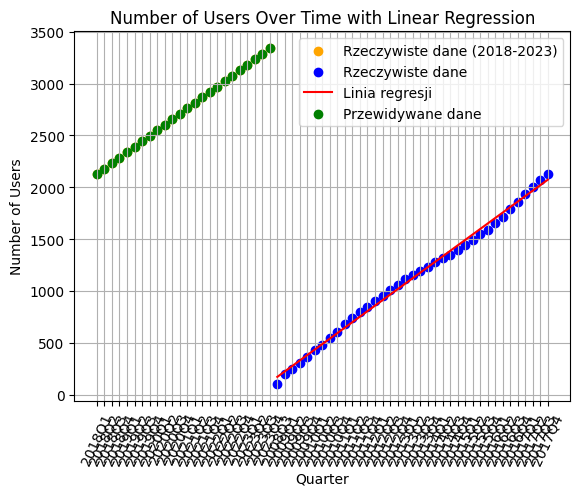

In [ ]:
# Przygotowanie danych do predykcji
future_indices = np.array([[37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60]])  # Indeksy dla przyszłych kwartałów

# Przewidywanie wartości
future_users_pred = model.predict(future_indices)
future_years_quarters = ['2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4','2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4']

future_real_data = pd.DataFrame({'Year_Quarter': future_years_quarters, 'Users': [2196, 2234, 2271, 2320, 2375, 2414, 2449, 2498, 2603, 2701, 2740, 2797, 2853, 2895, 2910, 2912, 2936, 2934, 2958, 2963, 2989, 3030, 3049, 3065]})
# Dodanie przewidywanych wartości do istniejących danych
future_data = pd.DataFrame({'Year_Quarter': future_years_quarters, 'Users': future_users_pred})

# Wyświetlanie przewidywanych wartości
# print(future_data)

# rysowanie wykresu z przewidywanymi wartościami
plt.scatter(future_data['Year_Quarter'], future_data['Users'], color='orange', label='Rzeczywiste dane (2018-2023)')
plt.scatter(users_data['Year_Quarter'], users_data['Users'], color='blue', label='Rzeczywiste dane')
plt.plot(users_data['Year_Quarter'], y_pred, color='red', label='Linia regresji')
plt.scatter(future_data['Year_Quarter'], future_data['Users'], color='green', label='Przewidywane dane')
plt.xlabel('Quarter')
plt.ylabel('Number of Users')
plt.title('Number of Users Over Time with Linear Regression')
plt.xticks(rotation=65)
plt.legend()
plt.grid(True)
plt.show()

#print(future_data)


#### Dane rzeczywiste

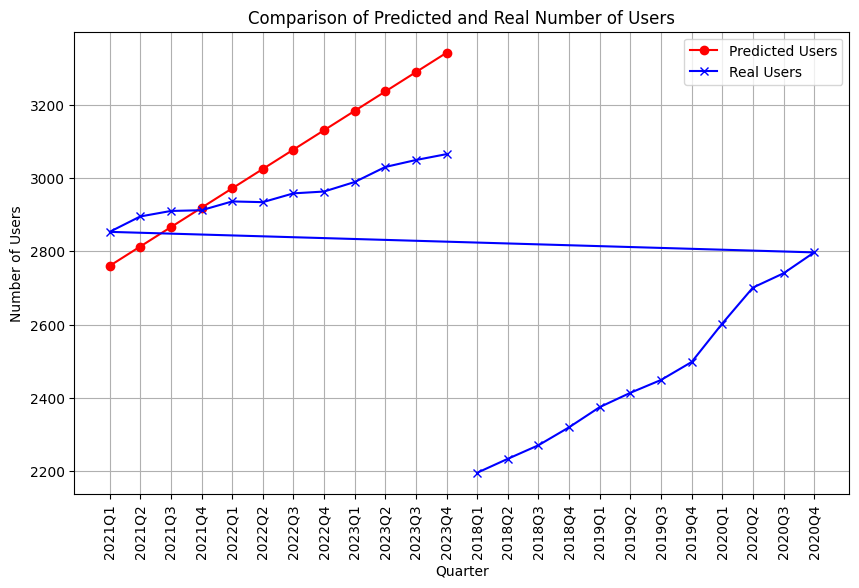

In [ ]:
# Plotting the predicted and real data for comparison
plt.figure(figsize=(10, 6))


# Przygotowanie danych do predykcji
future_indices = np.array([ [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60]])  # Indeksy dla przyszłych kwartałów

# Przewidywanie wartości
future_users_pred = model.predict(future_indices)

future_years_quarters = ['2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4']
future_data = pd.DataFrame({'Year_Quarter': future_years_quarters, 'Users': future_users_pred})

# Plot predicted data
plt.plot(future_data['Year_Quarter'], future_data['Users'], color='red', marker='o', label='Predicted Users')

# Plot real data
plt.plot(future_real_data['Year_Quarter'], future_real_data['Users'], color='blue', marker='x', label='Real Users')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Number of Users')
plt.title('Comparison of Predicted and Real Number of Users')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Finanse i pracownicy

### Przychód

Dodanie modelu regresji do wykresu finansów i pracowników

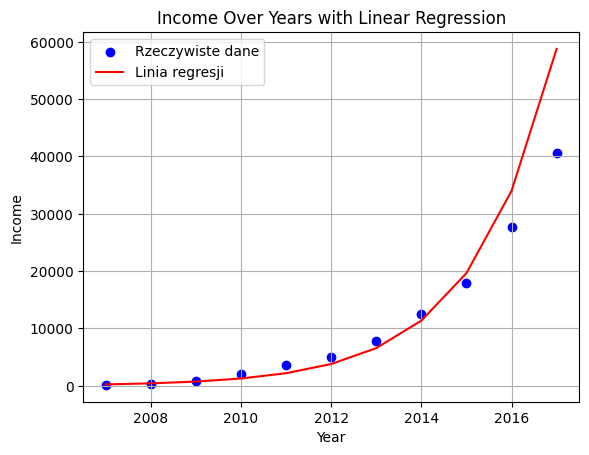

In [ ]:
# Przygotowanie danych do modelu regresji
X = finance_data.index.values.reshape(-1, 1)  # Używamy indeksu jako zmiennej niezależnej
y = finance_data['Income'].values  # Zmienna zależna
log_y = np.log(y)

# Tworzenie i trenowanie modelu regresji liniowej
model_finance = LinearRegression()
model_finance.fit(X, log_y)

# Przewidywanie wartości
log_y_pred = model_finance.predict(X)
y_pred = np.exp(log_y_pred)

# Rysowanie wykresu z linią regresji
plt.scatter(finance_data['Year'], finance_data['Income'], color='blue', label='Rzeczywiste dane')
plt.plot(finance_data['Year'], y_pred, color='red', label='Linia regresji')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income Over Years with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


Wyświetlanie parametrów regresji

In [ ]:
import statsmodels.api as sm

# Przygotowanie danych do modelu regresji
X = sm.add_constant(finance_data['Year'])  # Dodanie stałej do modelu
y = finance_data['Income']

# Tworzenie i trenowanie modelu regresji liniowej
model_finance = sm.OLS(y, X).fit()

# Wyświetlanie wyników modelu
print(model_finance.summary())

# Wyciąganie parametrów strukturalnych
params = model_finance.params
print("Parametry strukturalne:", params)

# Wyciąganie odchyleń standardowych
std_err = model_finance.bse
print("Odchylenia standardowe:", std_err)

# Wyciąganie miar dopasowania
r_squared = model_finance.rsquared
print("R-kwadrat:", r_squared)

# Testowanie hipotez
hypothesis_test = model_finance.t_test([1, 0])
print("Test hipotezy dla wyrazu wolnego:", hypothesis_test)

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     35.32
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           0.000217
Time:                        17:21:15   Log-Likelihood:                -110.62
No. Observations:                  11   AIC:                             225.2
Df Residuals:                       9   BIC:                             226.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.096e+06    1.2e+06     -5.934      0.0

c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Zysk

### Pracownicy

### Proponowane modele regresji liniowej

W niniejszym notatniku zastosowano dwa modele regresji liniowej: jeden do analizy liczby użytkowników w czasie, a drugi do analizy dochodów finansowych w czasie. Poniżej przedstawiono uzasadnienie wyboru tych modeli oraz sposób ich praktycznego użycia.

#### 1. Model regresji liniowej dla liczby użytkowników

Model regresji liniowej został zastosowany do analizy liczby użytkowników w czasie. Wykorzystano indeksy jako zmienną niezależną (X) oraz liczbę użytkowników jako zmienną zależną (y). Model ten pozwala na:

- **Analizę trendów**: Możemy zidentyfikować, czy liczba użytkowników rośnie, maleje, czy pozostaje stabilna w czasie.
- **Predykcję przyszłych wartości**: Na podstawie istniejących danych możemy przewidzieć liczbę użytkowników w przyszłych okresach.
- **Ocena wpływu sezonowości**: Możemy sprawdzić, czy istnieją okresy, w których liczba użytkowników znacząco się zmienia.

#### 2. Model regresji liniowej dla dochodów finansowych

Model regresji liniowej został zastosowany do analizy dochodów finansowych w czasie. Wykorzystano indeksy jako zmienną niezależną (X) oraz logarytm dochodów jako zmienną zależną (log_y). Model ten pozwala na:

- **Analizę wzrostu dochodów**: Możemy zidentyfikować, czy dochody rosną wykładniczo w czasie.
- **Predykcję przyszłych dochodów**: Na podstawie istniejących danych możemy przewidzieć przyszłe dochody finansowe.
- **Ocena stabilności finansowej**: Możemy sprawdzić, czy dochody są stabilne, czy też występują duże wahania.

### Praktyczne użycie modeli

#### Predykcja liczby użytkowników

Model regresji liniowej dla liczby użytkowników może być użyty do przewidywania liczby użytkowników w przyszłych kwartałach. Na przykład, możemy przewidzieć liczbę użytkowników na podstawie danych historycznych i ocenić, czy nasze działania marketingowe przynoszą oczekiwane rezultaty.

#### Predykcja dochodów finansowych

Model regresji liniowej dla dochodów finansowych może być użyty do przewidywania przyszłych dochodów firmy. Na przykład, możemy przewidzieć dochody na podstawie danych historycznych i ocenić, czy nasze strategie biznesowe są skuteczne. Możemy również ocenić, czy firma jest na dobrej drodze do osiągnięcia swoich celów finansowych.

### Podsumowanie
W niniejszym notatniku modele regresji wykorzystano do analizy liczby użytkowników oraz dochodów finansowych, co pozwala na lepsze zrozumienie trendów i podejmowanie bardziej świadomych decyzji biznesowych.

### Wnioski

Na podstawie opracowanych modeli regresji liniowej oraz przeprowadzonych obliczeń można sformułować następujące wnioski:

#### 1. Liczba użytkowników

- **Trend wzrostowy**: Analiza liczby użytkowników w czasie wykazała trend wzrostowy, co sugeruje, że liczba użytkowników rośnie w kolejnych kwartałach.
- **Przewidywanie przyszłych wartości**: Model regresji liniowej pozwala na przewidywanie liczby użytkowników w przyszłych okresach. Na podstawie istniejących danych można prognozować dalszy wzrost liczby użytkowników.
- **Sezonowość**: Analiza wykazała, że liczba użytkowników może podlegać sezonowym wahaniom, co warto uwzględnić przy planowaniu działań marketingowych.

#### 2. Dochody finansowe

- **Wzrost dochodów**: Model regresji liniowej dla dochodów finansowych wykazał, że dochody rosną wykładniczo w czasie. Sugeruje to, że firma osiąga coraz wyższe dochody w kolejnych latach.
- **Stabilność finansowa**: Analiza dochodów finansowych wskazuje na stabilność finansową firmy, co jest pozytywnym sygnałem dla inwestorów i zarządu.
- **Przewidywanie przyszłych dochodów**: Model regresji liniowej pozwala na przewidywanie przyszłych dochodów firmy. Na podstawie danych historycznych można prognozować dalszy wzrost dochodów, co może pomóc w planowaniu strategicznym.

### Rekomendacje

- **Kontynuacja działań marketingowych**: Wzrost liczby użytkowników sugeruje, że obecne działania marketingowe są skuteczne. Warto kontynuować i ewentualnie zwiększyć nakłady na marketing, aby przyciągnąć jeszcze więcej użytkowników.
- **Inwestycje w rozwój**: Stabilny wzrost dochodów finansowych pozwala na inwestowanie w rozwój firmy, np. w nowe produkty, technologie czy rynki zbytu.
- **Monitorowanie sezonowości**: Warto monitorować sezonowe wahania liczby użytkowników i dostosowywać do nich strategie marketingowe oraz operacyjne.

### Podsumowanie

Opracowane modele regresji liniowej dostarczyły cennych informacji na temat trendów w liczbie użytkowników oraz dochodach finansowych firmy. Na podstawie tych analiz można podejmować bardziej świadome decyzje biznesowe, które przyczynią się do dalszego rozwoju i sukcesu firmy.
```